In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py
from tqdm import tqdm

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data")

In [3]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [4]:
df.drop("other", axis=1, inplace=True)

In [5]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,...,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,-[840801013]
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,...,?,t,64,t,0.83,t,77,f,?,-[870119022]
9167,22,M,f,f,f,f,f,f,f,f,...,?,t,91,t,0.92,t,99,f,?,-[870119023]
9168,69,M,f,f,f,f,f,f,f,f,...,?,t,113,t,1.27,t,89,f,?,I[870119025]
9169,47,F,f,f,f,f,f,f,f,f,...,?,t,75,t,0.85,t,88,f,?,-[870119027]


In [6]:
feature_cols = ["age", "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication", "sick", "pregnant", 
                "thyroid_surgery", "I131_treatment", "query_hypothyroid", "query_hyperthyroid", "lithium", "goitre",
               "tumor", "hypopituitary", "psych", "TSH_measured", "TSH", "T3_measured", "T3", "TT4_measured", "TT4",
               "T4U_measured", "T4U", "FTI_measured", "FTI", "TBG_measured", "TBG", "target"]

In [7]:
df.columns = feature_cols

In [8]:
df.head(30)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,-[840801014]
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,-[840801042]
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803046]
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S[840803047]
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,-[840803048]
5,77,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,21,-[840803068]
6,28,F,f,f,f,f,f,f,f,f,...,2.6,t,116,f,?,f,?,f,?,-[840807019]
7,28,F,f,f,f,f,f,f,f,f,...,1.8,t,76,f,?,f,?,f,?,-[840808060]
8,28,F,f,f,f,f,f,f,f,f,...,1.7,t,83,f,?,f,?,f,?,-[840808073]
9,54,F,f,f,f,f,f,f,f,f,...,2.3,t,133,f,?,f,?,f,?,-[840810016]


In [9]:
target = df.target
create = target.str.split( '([A-Za-z]+)', expand=True)
create = create[1]
target = create.replace({None:'Z'})
df.target = target

In [10]:
df.target.unique()

array(['Z', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C', 'O', 'LJ', 'H', 'D', 'GK', 'MI', 'P', 'FK',
       'B', 'GI', 'GKJ', 'OI', 'E'], dtype=object)

In [11]:
df.head(30)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,?,f,?,f,?,Z
1,41,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,26,Z
5,77,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,t,21,Z
6,28,F,f,f,f,f,f,f,f,f,...,2.6,t,116,f,?,f,?,f,?,Z
7,28,F,f,f,f,f,f,f,f,f,...,1.8,t,76,f,?,f,?,f,?,Z
8,28,F,f,f,f,f,f,f,f,f,...,1.7,t,83,f,?,f,?,f,?,Z
9,54,F,f,f,f,f,f,f,f,f,...,2.3,t,133,f,?,f,?,f,?,Z


In [12]:
df = df.replace(['?'],np.nan)

In [13]:
df.isnull().sum()

age                             0
sex                           307
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           842
T3_measured                     0
T3                           2603
TT4_measured                    0
TT4                           441
T4U_measured                    0
T4U                           808
FTI_measured                    0
FTI                           801
TBG_measured                    0
TBG                          8822
target                          0
dtype: int64

In [14]:
df.head(30)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128,f,NaN,f,NaN,f,NaN,Z
1,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,11,Z
2,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z
3,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,36,S
4,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,26,Z
5,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,f,NaN,t,21,Z
6,28,F,f,f,f,f,f,f,f,f,...,2.6,t,116,f,NaN,f,NaN,f,NaN,Z
7,28,F,f,f,f,f,f,f,f,f,...,1.8,t,76,f,NaN,f,NaN,f,NaN,Z
8,28,F,f,f,f,f,f,f,f,f,...,1.7,t,83,f,NaN,f,NaN,f,NaN,Z
9,54,F,f,f,f,f,f,f,f,f,...,2.3,t,133,f,NaN,f,NaN,f,NaN,Z


In [ ]:
df.drop(['TBG_measured','TBG', 'T3_measured', 'TSH_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured'],axis=1, inplace=True)

In [16]:
df.sex.replace({'F':2, 'M':1}, inplace=True)

In [17]:
round_values = round(df.sex.mean())
df.sex.fillna(round_values, inplace = True)

In [18]:
df.sex.unique()

array([2., 1.])

In [19]:
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH                           842
T3                           2603
TT4                           441
T4U                           808
FTI                           801
TBG                          8822
target                          0
dtype: int64

In [40]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)

In [41]:
cols = ['TSH', 'T3', 'TT4', 'T4U','FTI']
for i in cols:
    df[i] = knnimp.fit_transform(df[[i]])

KeyError: "None of [Index(['TT4'], dtype='object')] are in the [columns]"

In [ ]:
df.isnull().sum()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        9171 non-null   float64
 2   on_thyroxine               9171 non-null   object 
 3   query_on_thyroxine         9171 non-null   object 
 4   on_antithyroid_medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid_surgery            9171 non-null   object 
 8   I131_treatment             9171 non-null   object 
 9   query_hypothyroid          9171 non-null   object 
 10  query_hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

<Axes: >

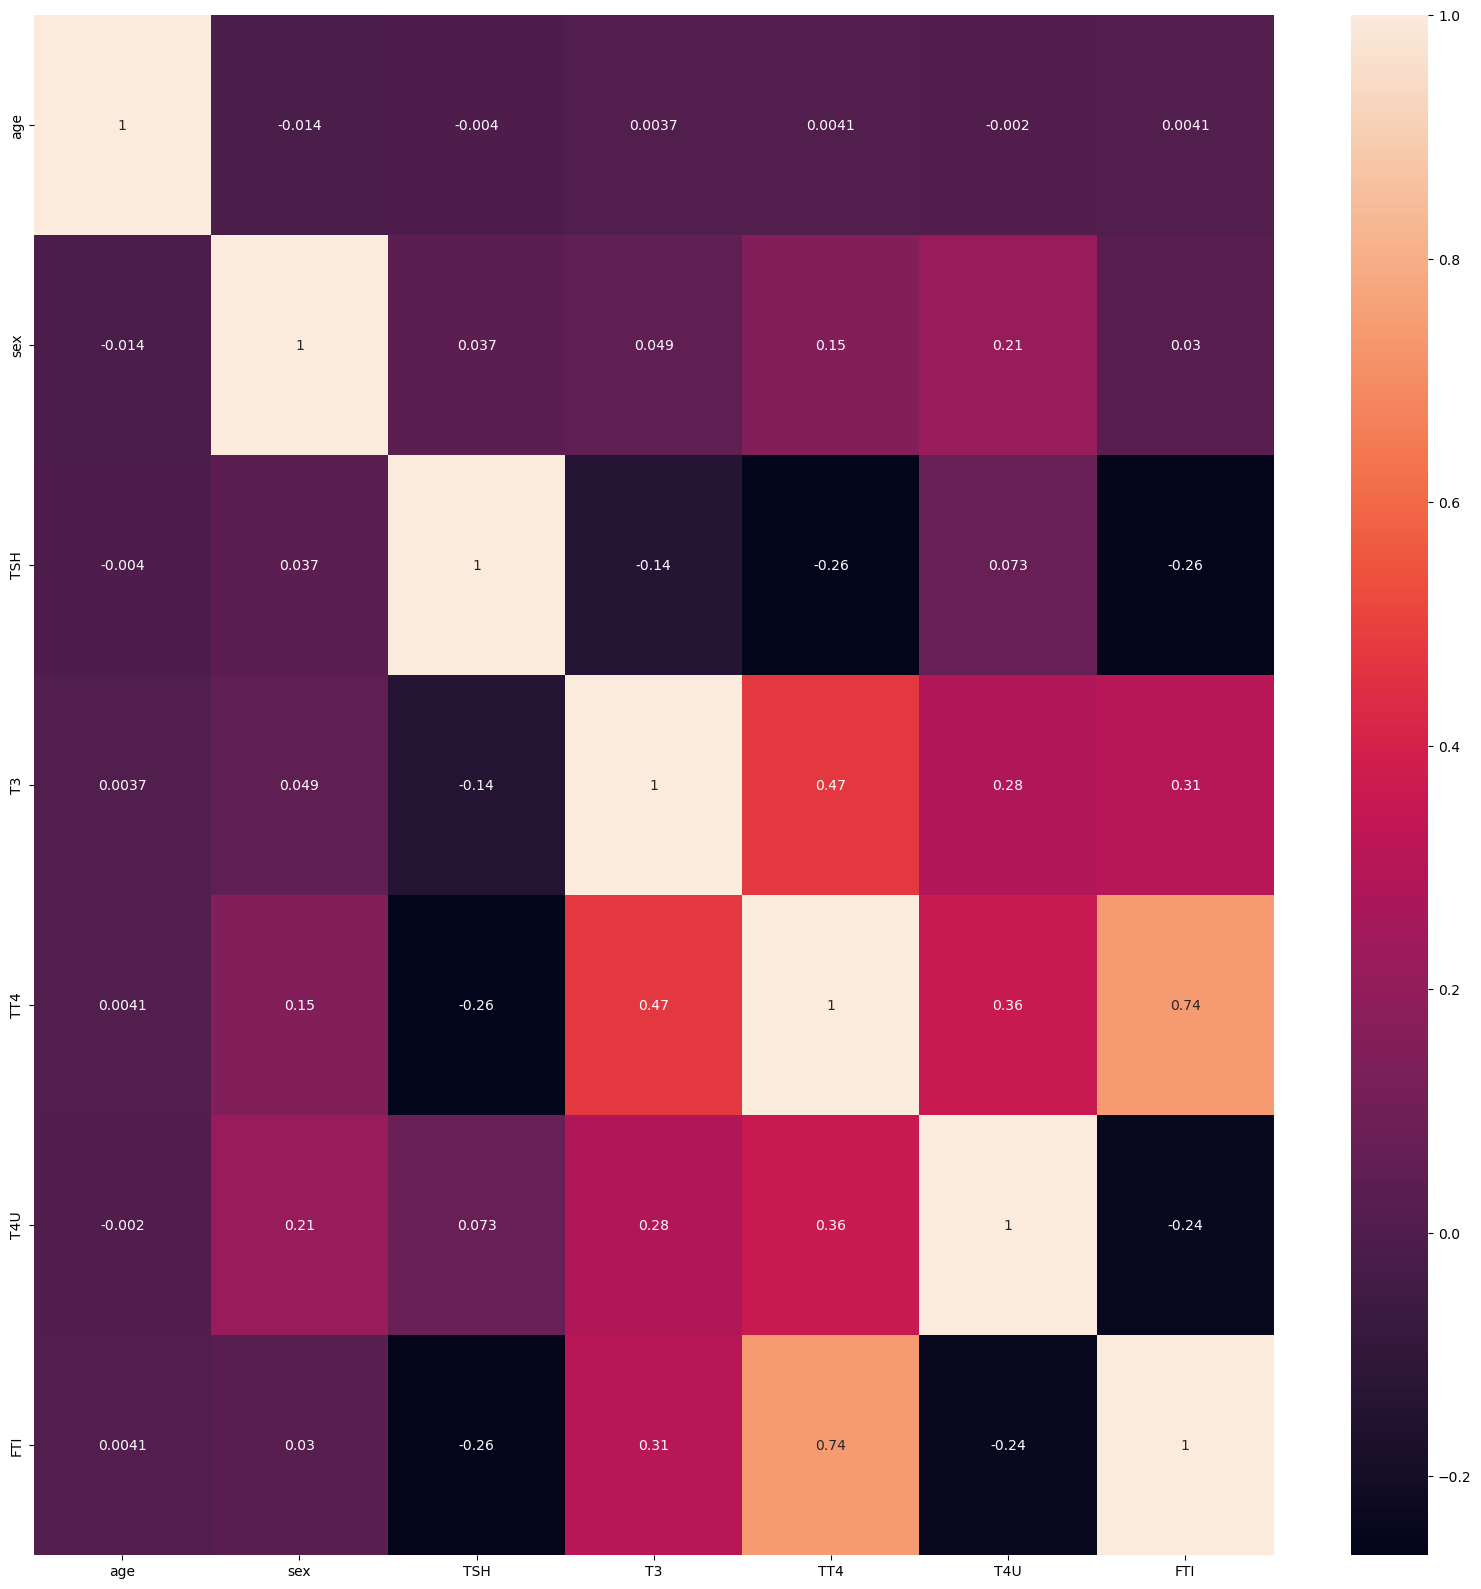

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
py.figure(figsize=(20,20))
sns.heatmap(numeric_df.corr(),annot=True)

In [25]:
numeric_df.corr()

,age,sex,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.014175,-0.003979,0.003693,0.004122,-0.002045,0.004108
sex,-0.014175,1.000000,0.036723,0.048890,0.150479,0.214723,0.030149
TSH,-0.003979,0.036723,1.000000,-0.136613,-0.264756,0.072962,-0.257901
T3,0.003693,0.048890,-0.136613,1.000000,0.471792,0.281336,0.312401
TT4,0.004122,0.150479,-0.264756,0.471792,1.000000,0.362280,0.738279
T4U,-0.002045,0.214723,0.072962,0.281336,0.362280,1.000000,-0.238927
FTI,0.004108,0.030149,-0.257901,0.312401,0.738279,-0.238927,1.000000


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
object_df = df.select_dtypes(include=['object'])

In [28]:
for i in object_df.columns:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        continue

In [29]:
for a in range(len(numeric_df.corr())):
    for b in range(a):
        if((numeric_df.corr().iloc[a,b]) >= 0.7):
            print(numeric_df.corr().columns[b])

TT4


In [30]:
df.drop('TT4', axis = 1, inplace = True)

In [31]:
y = df.target
df2 = df.drop('target', axis = 1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2,y , test_size = 0.3, random_state = 42) 

In [33]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, verbose = 1)
lr_train = lr.fit(X_train, y_train)
y_predict = lr_train.predict(X_test)
accuracy_score(y_predict, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\mihir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.0s finished


0.8146802325581395

# KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
X_train_contig = np.ascontiguousarray(X_train)
X_test_contig = np.ascontiguousarray(X_test)
y_train_contig = np.ascontiguousarray(y_train)
y_test_contig = np.ascontiguousarray(y_test)

KNN = KNeighborsClassifier(n_neighbors=3)
knn_train = KNN.fit(X_train_contig, y_train_contig)
y_predict = knn_train.predict(X_test_contig)
accuracy = accuracy_score(y_predict, y_test_contig)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7768895348837209


# Random Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 3, n_estimators=200)
rf_train = rf.fit(X_train, y_train)
rf_predict = rf_train.predict(X_test)
accuracy_score(rf_predict, y_test)

0.7492732558139535

# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3)
d_train = tree.fit(X_train, y_train)
d_test = d_train.predict(X_test)
accuracy_score(d_test, y_test)

0.8430232558139535